In [1]:
#Import the dependency

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Remove the warnings
import warnings
warnings.filterwarnings("ignore")


# Load the dataset


In [ ]:
#df=pd.read_csv("Email_spam_Detection.csv")
df = pd.read_csv("Email_spam_Detection.csv", encoding='ISO-8859-1')


#Print the first five rows
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [ ]:
df.shape

(5169, 6)

# Data Cleaning

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [ ]:
# Drop the last  three columns beacause it has most element has nan values
df=df.drop(columns=["Unnamed: 2","Unnamed: 3","Unnamed: 4"])

In [ ]:
df.sample(5)

,v1,v2
2753,ham,"Derp. Which is worse, a dude who always wants ..."
4994,ham,"Just looked it up and addie goes back Monday, ..."
5389,ham,Ok.ok ok..then..whats ur todays plan
3577,ham,They said Ì_ dun haf passport or smth like dat...
1684,ham,Do you want bold 2 or bb torch


In [ ]:
# Renaming the columns name
df.rename(columns={"v1":"Target","v2":"Text"},inplace=True)
df.sample(5)

,Target,Text
3844,ham,Mmmm.... I cant wait to lick it!
1846,ham,Its on in engalnd! But telly has decided it wo...
2741,spam,I don't know u and u don't know me. Send CHAT ...
4644,ham,Are you planning to come chennai?
313,ham,"Hi the way I was with u 2day, is the normal wa..."


In [ ]:
#Apply the label encoder on the Target  columns
from sklearn.preprocessing import LabelEncoder
df["Target"]=LabelEncoder().fit_transform(df["Target"])

"""
0 indicate --> ham
1 --> spam
"""

df.head()

,Target,Text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
# Check ing the missing values
df.isnull().sum()

Target    0
Text      0
dtype: int64

In [ ]:
# Check the duplicated values
df.duplicated().sum()

403

In [ ]:
# Drop the duplicated values
df=df.drop_duplicates(keep="first")

# Check the duplicated values
df.duplicated().sum()

0

# EDA

In [ ]:
df["Target"].value_counts()

Target
0    4516
1     653
Name: count, dtype: int64

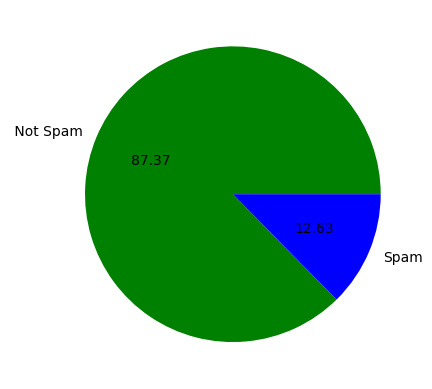

In [ ]:
plt.pie(df["Target"].value_counts(),labels=[" Not Spam","Spam"],colors=["green","blue"],autopct="%0.2f")
plt.show()


In [ ]:
# Data is imbalanced

In [ ]:
#Break the text into sentence and words
import nltk
nltk.download("punkt")

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
# Calculate the number a character 
df["Num_Character"]=df["Text"].apply(len)
df.head()

,Target,Text,Num_Character
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [ ]:
# Number of words
df["Text"].apply(lambda x:nltk.word_tokenize(x))

0       [Go, until, jurong, point, ,, crazy, .., Avail...
1                [Ok, lar, ..., Joking, wif, u, oni, ...]
2       [Free, entry, in, 2, a, wkly, comp, to, win, F...
3       [U, dun, say, so, early, hor, ..., U, c, alrea...
4       [Nah, I, do, n't, think, he, goes, to, usf, ,,...
                              ...                        
5567    [This, is, the, 2nd, time, we, have, tried, 2,...
5568     [Will, Ì_, b, going, to, esplanade, fr, home, ?]
5569    [Pity, ,, *, was, in, mood, for, that, ., So, ...
5570    [The, guy, did, some, bitching, but, I, acted,...
5571                  [Rofl, ., Its, true, to, its, name]
Name: Text, Length: 5169, dtype: object

In [ ]:
# Calculate the number of words
df["Num_Words"]=df["Text"].apply(lambda x:len(nltk.word_tokenize(x)))

In [ ]:
# Number of sentences
df["Num_sentence"]=df["Text"].apply(lambda x:len(nltk.sent_tokenize(x)))

In [ ]:
df.head()

,Target,Text,Num_Character,Num_Words,Num_sentence
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [ ]:
df[["Num_Character","Num_Words","Num_sentence"]].describe()

,Num_Character,Num_Words,Num_sentence
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [ ]:
# Ham message
df[df["Target"]==0][["Num_Character","Num_Words","Num_sentence"]].describe()

,Num_Character,Num_Words,Num_sentence
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [ ]:
#Spam message 

df[df["Target"]==1][["Num_Character","Num_Words","Num_sentence"]].describe()

,Num_Character,Num_Words,Num_sentence
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


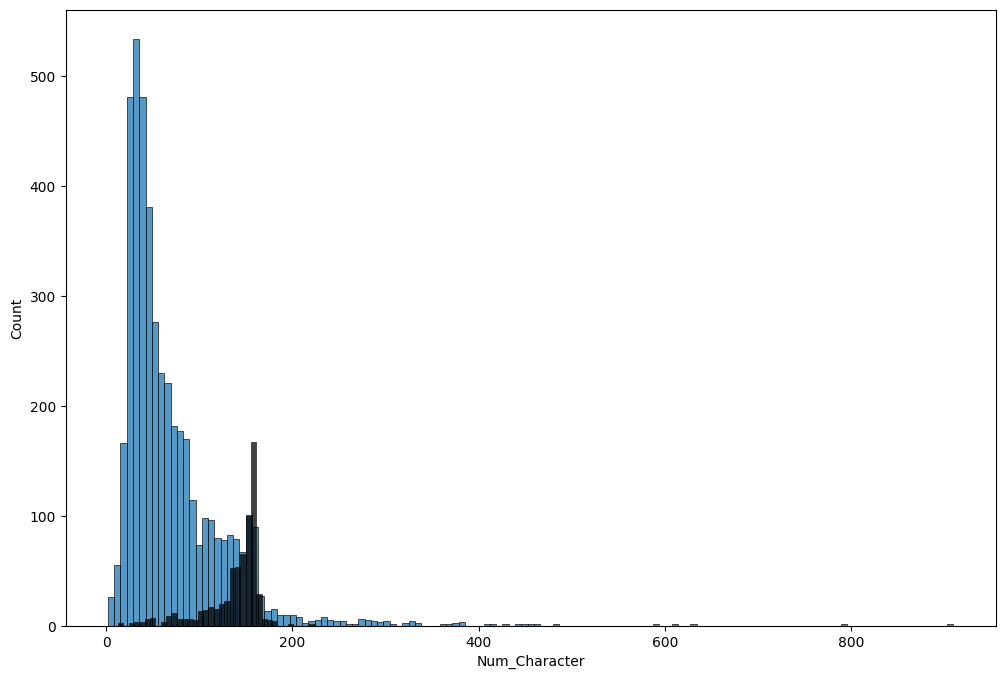

In [ ]:
# Plot 
plt.figure(figsize=(12,8))
sns.histplot(df[df["Target"]==0]["Num_Character"])
sns.histplot(df[df["Target"]==1]["Num_Character"],color="black")
plt.show()

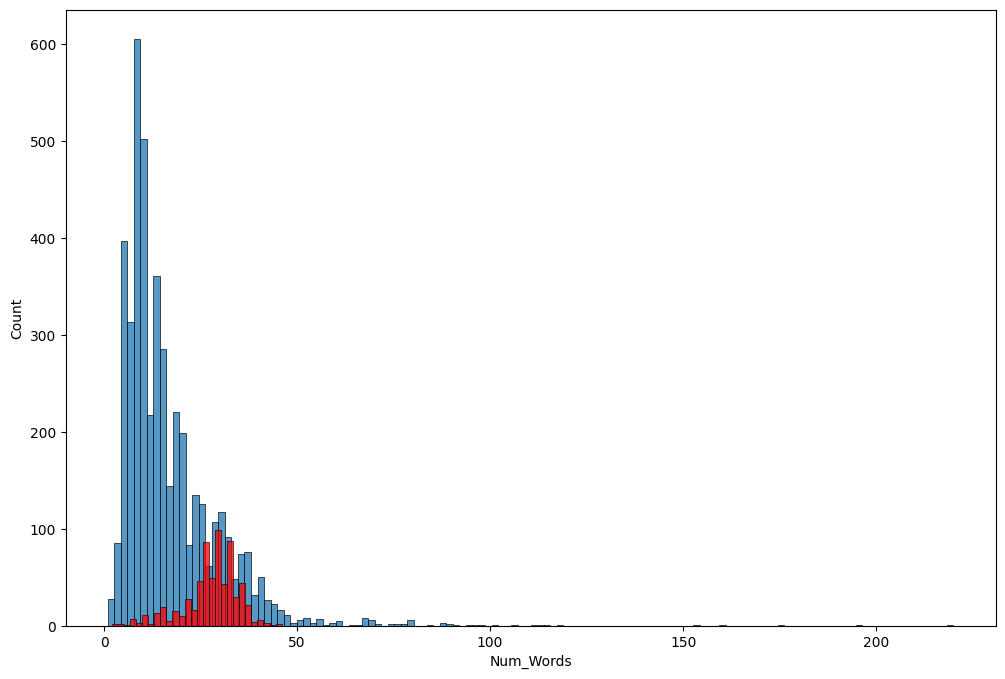

In [ ]:
# Plot 
plt.figure(figsize=(12,8))
sns.histplot(df[df["Target"]==0]["Num_Words"])
sns.histplot(df[df["Target"]==1]["Num_Words"],color="red")
plt.show()

<Figure size 1200x800 with 0 Axes>

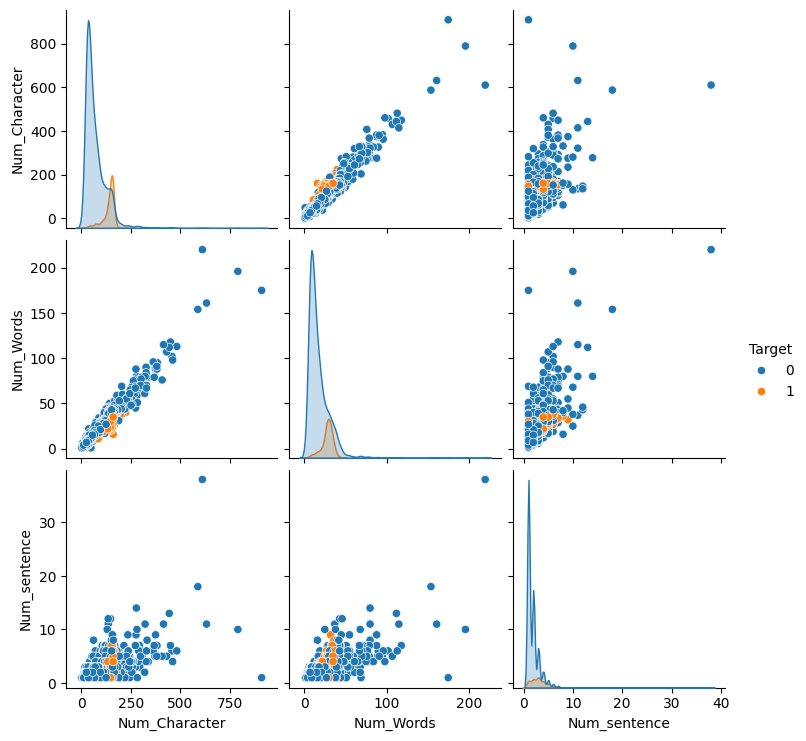

In [ ]:
plt.figure(figsize=(12,8))
sns.pairplot(hue="Target",data=df)
plt.show()

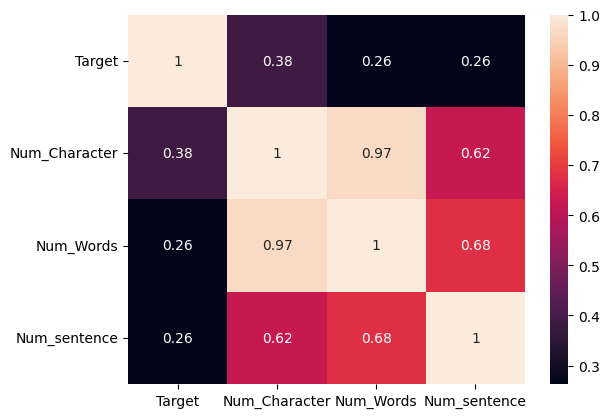

In [ ]:
sns.heatmap(df.select_dtypes(include="number").corr(),annot=True)
plt.show()

# Text(Data) preprocessing
 **Lower case**  
 **Tokenization**  
 **Removing special character**  
 **Removing stop words and punctuation**  
 **Stemming**  

In [ ]:
import nltk
import string
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()
nltk.download('stopwords') 
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
# Create a funtion
def transform_text(text):
    text=text.lower()
    text=nltk.word_tokenize(text)
    
    y=[]
    for i in text:
        if i.isalnum():
            y.append(i)
    text=y[:]
    y.clear()
    
    for i in text:#Removing the stop words and punctuation
        if i not in stopwords.words("english") and i not in string.punctuation:
            y.append(i)
    
    text=y[:]
    y.clear()
    for i in text:
        y.append(ps.stem(i))
        
    return " ".join(y)

In [ ]:
transform_text("Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'")

'go jurong point crazi avail bugi n great world la e buffet cine got amor wat'

In [ ]:
df["Text"][0]

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [ ]:
df["tranform_Text"]=df["Text"].apply(transform_text)

In [ ]:
df.head(2)

,Target,Text,Num_Character,Num_Words,Num_sentence,tranform_Text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni


# Create the word cloud for get the important

In [ ]:
from wordcloud import WordCloud
wc=WordCloud(width=500,height=500,min_font_size=10,background_color="white")

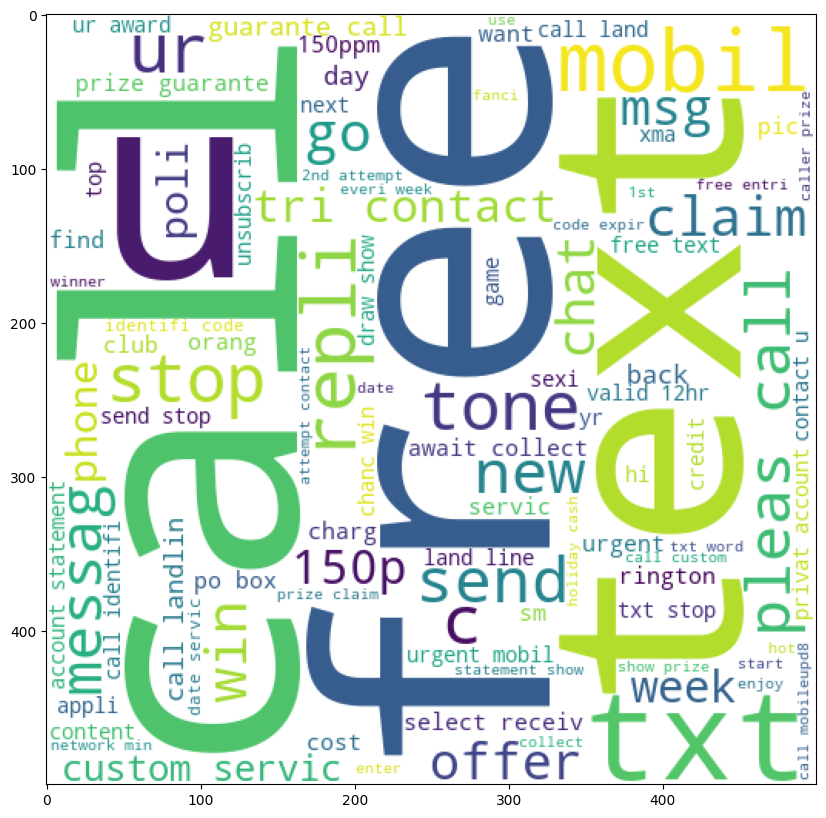

In [ ]:
# Get the most words for spam
spam_wc=wc.generate(df[df["Target"]==1]["tranform_Text"].str.cat(sep=" "))
plt.figure(figsize=(12,10))
plt.imshow(spam_wc)
plt.show()

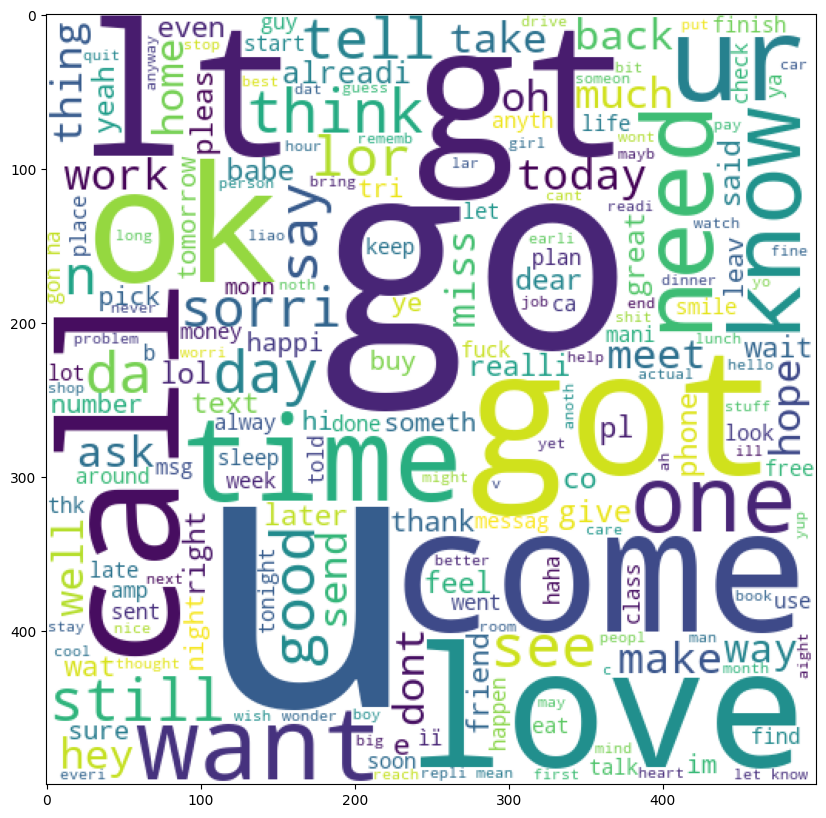

In [ ]:
# Get the most words for ham
ham_wc=wc.generate(df[df["Target"]==0]["tranform_Text"].str.cat(sep=" "))
plt.figure(figsize=(18,10))
plt.imshow(ham_wc)
plt.show()

In [ ]:
# Get the most 30 words of spam and ham  
df.head()

,Target,Text,Num_Character,Num_Words,Num_sentence,tranform_Text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [ ]:
spam_corpus=[]
for msg in df[df["Target"]==1]["tranform_Text"].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [ ]:
len(spam_corpus)

9939

In [ ]:
from collections import Counter
#pd.DataFrame(Counter(spam_corpus).most_common(30))

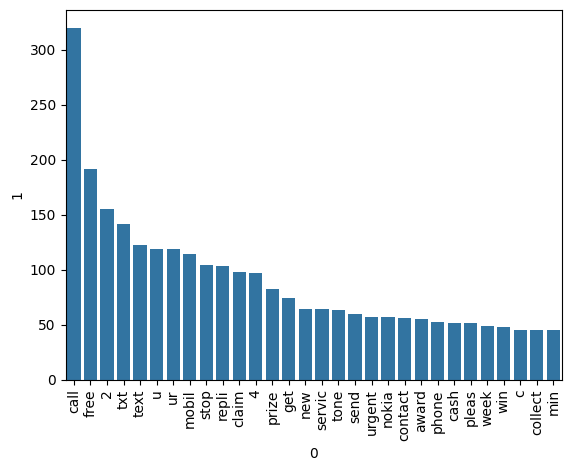

In [ ]:
# Plotting the bar plot
x=pd.DataFrame(Counter(spam_corpus).most_common(30))
sns.barplot(x=x[0], y=x[1])
plt.xticks(rotation="vertical")
plt.show()

In [ ]:
ham_corpus=[]
for msg in df[df["Target"]==0]["tranform_Text"].tolist():
    for word in msg.split():
        ham_corpus.append(word)

len(ham_corpus)

35404

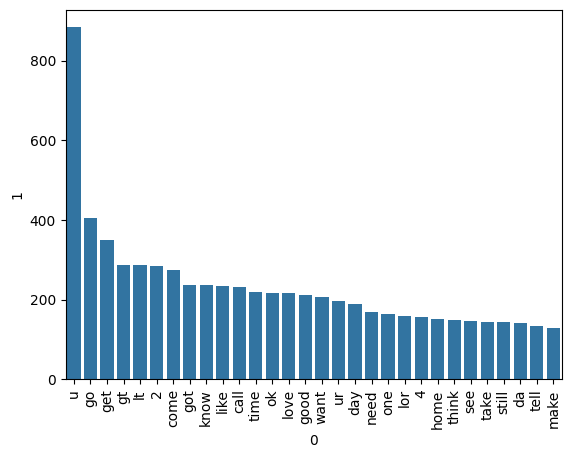

In [ ]:
h=pd.DataFrame(Counter(ham_corpus).most_common(30))
sns.barplot(x=h[0], y=h[1])
plt.xticks(rotation="vertical")
plt.show()

# Building Model 

In [ ]:
# Convert the text into vector
# Text Vectorization 
# using Bag of words

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
#cv=CountVectorizer()
tfidf=TfidfVectorizer(max_features=3000)

In [ ]:
X=tfidf.fit_transform(df["tranform_Text"]).toarray()
X.shape

(5169, 3000)

In [ ]:
y=df["Target"].values
y

array([0, 0, 1, ..., 0, 0, 0])

In [ ]:
# Apply the train test and split
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,classification_report
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.model_selection import train_test_split

X_train ,X_test,Y_train,Y_test=train_test_split(X,y,test_size=0.2,random_state=2)

#Build the model
gnb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()

In [ ]:
# It good work on the tfidf
#Here precision score is matter because imbalanced data
#Fit the model
mnb.fit(X_train,Y_train)
#Predict the model
Y_pred=mnb.predict(X_test)

#Evaluate the model
print("accuracy_score = ",accuracy_score(Y_test,Y_pred))
print("Precision score =",precision_score(Y_test,Y_pred)
)
print("confusion_matrix = \n ",confusion_matrix(Y_test,Y_pred))

accuracy_score =  0.9709864603481625
Precision score = 1.0
confusion_matrix = 
  [[896   0]
 [ 30 108]]


In [ ]:
df["Text"][2]

"Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's"

## Predication

In [ ]:
# Sample input text
input_text = ["Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's"]

# Preprocess and transform the input text using the fitted vectorizer
input_vector = tfidf.transform(input_text)

# Make the prediction
prediction = mnb.predict(input_vector)
print(prediction)
# Output the result
if prediction[0] == 1:
    print("Spam")
else:
    print("Not Spam")

[0]
Not Spam
